In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv("train.csv",index_col=0)



In [3]:
# to get the first 5 row of dataset:
df.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# to get the last 5 rows of dataset:
df.tail()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [22]:
#to get the shape of dataset:
df.shape

(891, 11)

In [6]:
#to check how many indexes are present in dataset:
df.index

Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
            ...
            882, 883, 884, 885, 886, 887, 888, 889, 890, 891],
           dtype='int64', name='PassengerId', length=891)

In [45]:
#to find names of all the column in given dataset:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [40]:
df.values

array([[0, 3, 'Braund, Mr. Owen Harris', ..., 7.25, nan, 'S'],
       [1, 1, 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)', ...,
        71.2833, 'C85', 'C'],
       [1, 3, 'Heikkinen, Miss. Laina', ..., 7.925, nan, 'S'],
       ...,
       [0, 3, 'Johnston, Miss. Catherine Helen "Carrie"', ..., 23.45,
        nan, 'S'],
       [1, 1, 'Behr, Mr. Karl Howell', ..., 30.0, 'C148', 'C'],
       [0, 3, 'Dooley, Mr. Patrick', ..., 7.75, nan, 'Q']], dtype=object)

In [7]:
# to count of  same  values present in any particular column in the dataset:
df["Age"].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, Length: 88, dtype: int64

In [110]:
# to get the unique values present in any particular column:
df["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [108]:
# to check count of  unique values of all the columns in the dataframe:
df.nunique()

Survived      2
Pclass        3
Name        891
Sex           2
Age          88
SibSp         7
Parch         7
Ticket      681
Fare        248
Cabin       147
Embarked      3
dtype: int64

In [7]:
#information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [11]:
#splitting the numerical and categorical data :
numerical_data=[i for i in df.columns if df[i].dtype!='O']
categorical_data=[i for i in df.columns if df[i].dtype=='O']
print("we have {} numerical data:{}".format(len(numerical_data),numerical_data))
print("we have {} categorical data:{}".format(len(categorical_data),categorical_data))

we have 6 numerical data:['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
we have 5 categorical data:['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


In [137]:
#use to find only integer related things we can't able to find out text features ,categoricalfeatures only applicable to integer
#decribe method gives all the statistics information of dataset.
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
# if you want to check statistics measure of any particular column:
df["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [5]:
#used to find only object dataset like string or timestamp:
df.describe(include ='object')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Graham, Mr. George Edward",male,347082,B96 B98,S
freq,1,577,7,4,644


In [6]:
df.describe(include='all')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,"Graham, Mr. George Edward",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [136]:
# to describe information of any particular dataset:
df["Sex"].describe()

count      891
unique       2
top       male
freq       577
Name: Sex, dtype: object

In [46]:
#Sex column will not be shown from now onwards in our dataset:
df.drop(columns=["Sex"])


,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,1,2,W./C. 6607,23.4500,NaN,S


In [10]:
## to check null values in any particular column and output we get in the boolean form:
df["Cabin"].isnull()

PassengerId
1       True
2      False
3       True
4      False
5       True
       ...  
887     True
888    False
889     True
890    False
891     True
Name: Cabin, Length: 891, dtype: bool

In [12]:
# to check  not null values in any particular column and output we get in the boolean form:
df["Cabin"].notnull()

PassengerId
1      False
2       True
3      False
4       True
5      False
       ...  
887    False
888     True
889    False
890     True
891    False
Name: Cabin, Length: 891, dtype: bool

In [13]:
#to find  total no of  missing values in any particular columns:
df["Age"].isnull().sum()

177

In [14]:
#to find column name which contain null value/missing value:
x=df.columns
for i in x:
    if df[i].isnull().sum()>0:
        print(i)

Age
Cabin
Embarked


In [15]:
# second way to find column name which contain null value/missing value:
[i for i in df.columns if df[i].isnull().sum()>0]

['Age', 'Cabin', 'Embarked']

In [4]:
# to sort the values of any column
df.sort_values(by="Sex")

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
384,1,1,"Holverson, Mrs. Alexander Oskar (Mary Aline To...",female,35.0,1,0,113789,52.0000,NaN,S
219,1,1,"Bazzani, Miss. Albina",female,32.0,0,0,11813,76.2917,D15,C
610,1,1,"Shutes, Miss. Elizabeth W",female,40.0,0,0,PC 17582,153.4625,C125,S
217,1,3,"Honkanen, Miss. Eliina",female,27.0,0,0,STON/O2. 3101283,7.9250,NaN,S
216,1,1,"Newell, Miss. Madeleine",female,31.0,1,0,35273,113.2750,D36,C
...,...,...,...,...,...,...,...,...,...,...,...
372,0,3,"Wiklund, Mr. Jakob Alfred",male,18.0,1,0,3101267,6.4958,NaN,S
373,0,3,"Beavan, Mr. William Thomas",male,19.0,0,0,323951,8.0500,NaN,S
374,0,1,"Ringhini, Mr. Sante",male,22.0,0,0,PC 17760,135.6333,NaN,C


In [5]:
# this slice condition will show whole dataset:
df[:]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [24]:
# to get the first 5 values from the any particular columns by using iloc[] method which is based on indexing method so :
# we have to use the slice , column index like (0 for first column,1 for second column ) like this we can fetch the data :
df.iloc[0:5,4]

PassengerId
1      male
2    female
3    female
4    female
5      male
Name: Sex, dtype: object

In [30]:
# to get details  more than one column  by using iloc[] method:
df.iloc[0:10,[2,3,4,7,8]]

,Name,Sex,Age,Ticket,Fare
PassengerId,,,,,
1,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500
2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833
3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000
5,"Allen, Mr. William Henry",male,35.0,373450,8.0500
6,"Moran, Mr. James",male,NaN,330877,8.4583
7,"McCarthy, Mr. Timothy J",male,54.0,17463,51.8625
8,"Palsson, Master. Gosta Leonard",male,2.0,349909,21.0750
9,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,347742,11.1333


In [38]:
# this loc[] method is not based on indexing in this we have to specify column name to fetch the data: 
df.loc[0:5,["Name"]]

,Name
PassengerId,
1,"Braund, Mr. Owen Harris"
2,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
3,"Heikkinen, Miss. Laina"
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
5,"Allen, Mr. William Henry"


In [37]:
# this loc[] method is not based on indexing in this we have to specify columns name to fetch the data from all the columns: 
df.loc[0:10,["Name","Age","Sex","Ticket","Fare"]]

,Name,Age,Sex,Ticket,Fare
PassengerId,,,,,
1,"Braund, Mr. Owen Harris",22.0,male,A/5 21171,7.2500
2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,female,PC 17599,71.2833
3,"Heikkinen, Miss. Laina",26.0,female,STON/O2. 3101282,7.9250
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,female,113803,53.1000
5,"Allen, Mr. William Henry",35.0,male,373450,8.0500
6,"Moran, Mr. James",NaN,male,330877,8.4583
7,"McCarthy, Mr. Timothy J",54.0,male,17463,51.8625
8,"Palsson, Master. Gosta Leonard",2.0,male,349909,21.0750
9,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",27.0,female,347742,11.1333


In [39]:
#here we set the index of our choice or we can say manuplating the index by using set_index() function :
df.set_index("Age")

,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Age,,,,,,,,,,
22.0,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,NaN,S
38.0,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C85,C
26.0,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,NaN,S
35.0,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,C123,S
35.0,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
27.0,0,2,"Montvila, Rev. Juozas",male,0,0,211536,13.0000,NaN,S
19.0,1,1,"Graham, Miss. Margaret Edith",female,0,0,112053,30.0000,B42,S
NaN,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,1,2,W./C. 6607,23.4500,NaN,S


In [7]:
#to find null values in particular columns:
df.loc[df["Age"].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...
860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S


In [43]:
#we can also use max,count,mean,and many  other statistical measures to know these values in any particular column:
df["Age"].min()

0.42

In [45]:
df["Age"].max()

80.0

In [46]:
df["Age"].mean()

29.69911764705882

In [47]:
df["Age"].median()

28.0

In [50]:
df["Age"].mode()

0    24.0
dtype: float64

In [13]:
df.groupby("Age").count()

,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Age,,,,,,,,,,
0.42,1,1,1,1,1,1,1,1,0,1
0.67,1,1,1,1,1,1,1,1,0,1
0.75,2,2,2,2,2,2,2,2,0,2
0.83,2,2,2,2,2,2,2,2,0,2
0.92,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...
70.00,2,2,2,2,2,2,2,2,1,2
70.50,1,1,1,1,1,1,1,1,0,1
71.00,2,2,2,2,2,2,2,2,1,2


In [16]:
#splitting the numerical and categorical data :
numerical_data=[i for i in df.columns if df[i].dtype!='O']
categorical_data=[i for i in df.columns if df[i].dtype=='O']
print("we have {} numerical data:{}".format(len(numerical_data),numerical_data))
print("we have {} categorical data:{}".format(len(categorical_data),categorical_data))

we have 6 numerical data:['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
we have 5 categorical data:['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


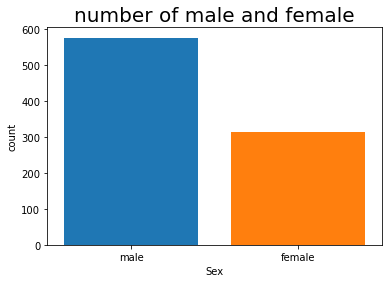

In [29]:
sns.countplot(x="Sex",data=df,orient="V",saturation=1)
plt.title("number of male and female",fontsize=20)
plt.show()

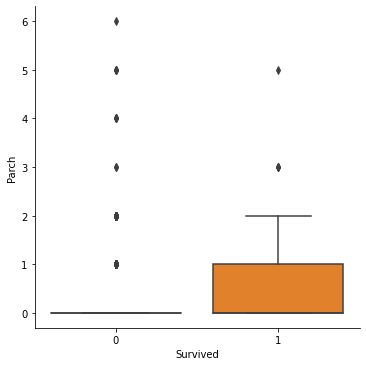

In [36]:
# for numerical data
sns.catplot(data=df,x="Survived",y="Parch",kind='box')

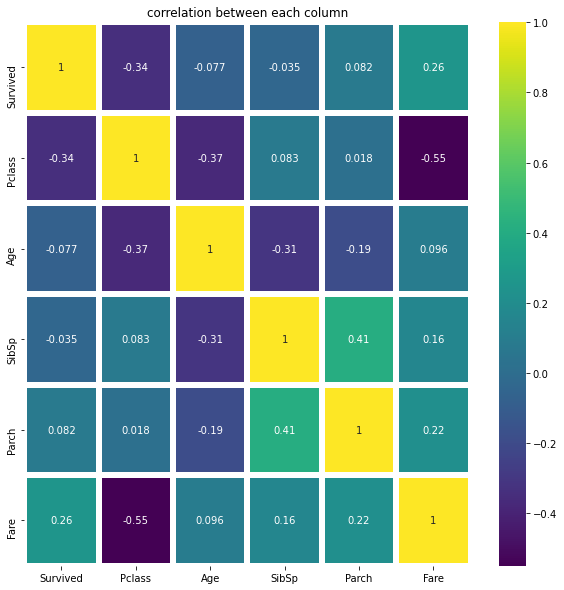

In [42]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),cmap='viridis',annot=True,linewidth=5)
plt.title("correlation between each column")
plt.show()

In [53]:
# to create dataframe manually the syntax is pd.Dataframe(dictionary,index=[]) where in keys=column name and values is the values
#inside column:
pd.DataFrame({'Yes': [50, 21,30,540,19,54], 'No': [131, 2,56,84,21,40]},index=[1,2,3,4,5,6])

,Yes,No
1,50,131
2,21,2
3,30,56
4,540,84
5,19,21
6,54,40


In [54]:
#The dictionary-list constructor assigns values to the column labels and help to create dataframe:
pd.DataFrame({'Bob': ['I liked it.', 'It was awful.','it is damn good','it is nasty','it is not healthy'], 
              'Sue': ['Pretty good.', 'Bland.','it was  so bad','it is nice for drink','it is not so cool']},
             index=["Product A", 'Product B',"Product C","Produt D","Product E"])

,Bob,Sue
Product A,I liked it.,Pretty good.
Product B,It was awful.,Bland.
Product C,it is damn good,it was so bad
Produt D,it is nasty,it is nice for drink
Product E,it is not healthy,it is not so cool
